## Homework for week 3!

CHATGPT HISTORY LOGS:

Q1, 2, and 3: https://chatgpt.com/share/66ee4649-02bc-8004-8f2d-902033fec02a

Q4: https://chatgpt.com/share/66ee4fab-ea08-8004-b9b6-c11186721db1

Q5: https://chatgpt.com/share/66f0dd7b-364c-8004-9aaa-be366d41d1b0

Other questions were answered using the resources provided.


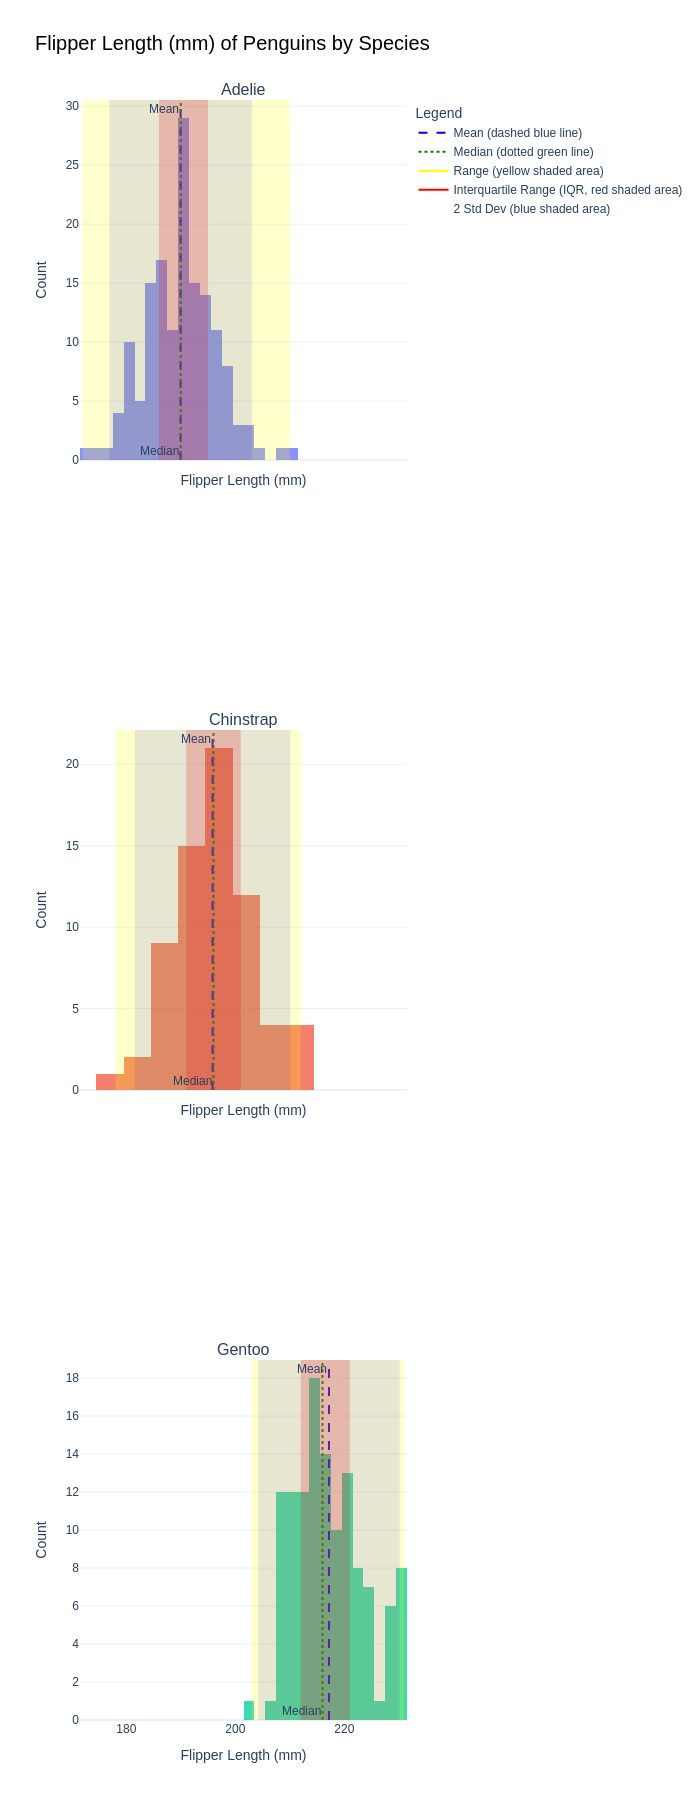

In [39]:
# QUESTION 1

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm and species
pingees = pingees.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species names
species_list = pingees['species'].unique()

# Create subplots: 1 row for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Loop through each species and plot histograms in separate subplots
for i, species in enumerate(species_list):
    species_data = pingees[pingees['species'] == species]
    
    # Calculate statistics
    flipper_length = species_data['flipper_length_mm']
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    std_dev = flipper_length.std()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    
    # Add histogram for the species
    fig.add_trace(go.Histogram(x=flipper_length, name=f"{species} Histogram", opacity=0.75, showlegend=False),
                  row=i+1, col=1)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_width=2, line_dash="dash", line_color="blue", 
                  annotation_text="Mean", annotation_position="top left", row=i+1, col=1)
    fig.add_vline(x=median, line_width=2, line_dash="dot", line_color="green", 
                  annotation_text="Median", annotation_position="bottom left", row=i+1, col=1)
    
    # Add rectangles for range, interquartile range, and 2 standard deviations
    # Range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="yellow", opacity=0.2, line_width=0, row=i+1, col=1)

    # Interquartile range (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="red", opacity=0.2, line_width=0, row=i+1, col=1)

    # 2 standard deviations around the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="blue", opacity=0.1, line_width=0, row=i+1, col=1)

# Add dummy Scatter traces to represent the legend
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="blue", dash="dash"), 
                         name="Mean (dashed blue line)"), row=1, col=1)
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="green", dash="dot"), 
                         name="Median (dotted green line)"), row=1, col=1)
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="yellow"), 
                         name="Range (yellow shaded area)"), row=1, col=1)
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="red"), 
                         name="Interquartile Range (IQR, red shaded area)"), row=1, col=1)
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color="blue", width=0), 
                         name="2 Std Dev (blue shaded area)"), row=1, col=1)

# Update layout for titles and labels
fig.update_layout(
    height=600 * len(species_list),  # Increase height based on number of species
    title_text="Flipper Length (mm) of Penguins by Species",  # Main title
    title_font=dict(size=20, color="black", family="Arial"),  # Bold and larger title
    xaxis_title="Flipper Length (mm)",  # X-axis label
    yaxis_title="Count",  # Y-axis label
    template="plotly_white",
    legend_title_text="Legend",  # Title for the legend
    xaxis=dict(title_font=dict(size=14)),  # Bold X-axis label
    yaxis=dict(title_font=dict(size=14))  # Bold Y-axis label
)

# Update the x-axis and y-axis labels for each subplot (row)
for i in range(len(species_list)):
    fig['layout'][f'xaxis{i+1}']['title'] = "Flipper Length (mm)"
    fig['layout'][f'xaxis{i+1}']['title_font'] = dict(size=14)
    fig['layout'][f'yaxis{i+1}']['title'] = "Count"
    fig['layout'][f'yaxis{i+1}']['title_font'] = dict(size=14)

# Show the figure
fig.show(renderer = "png")


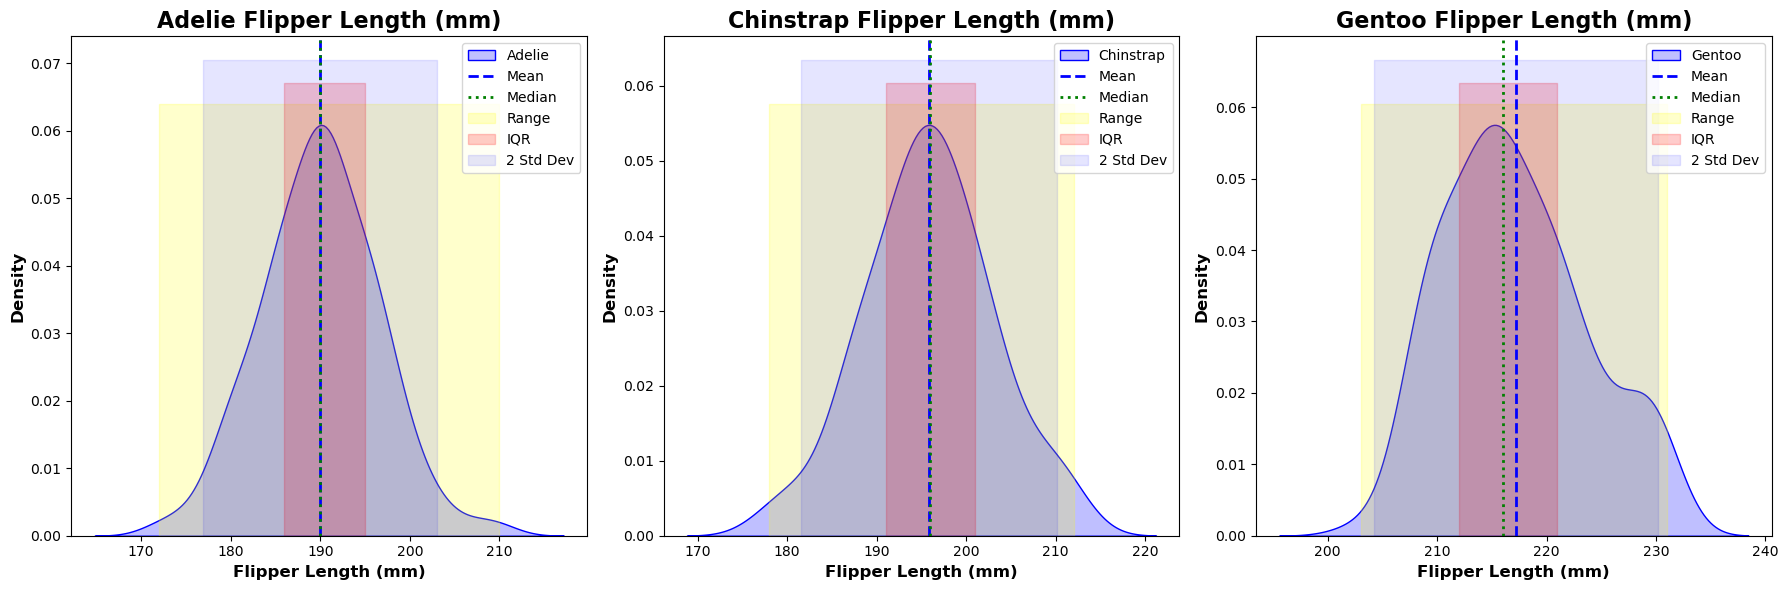

In [23]:
# QUESTION 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm and species
pingees = pingees.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species names
species_list = pingees['species'].unique()

# Set up a figure with a grid layout (3 plots per row)
n_cols = 3
n_rows = (len(species_list) + n_cols - 1) // n_cols  # Calculate rows based on the number of species
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Loop through each species and create KDE plots
for i, species in enumerate(species_list):
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_dev = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Create the KDE plot for the species
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='blue', label=f'{species}')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean', linewidth=2)
    axes[i].axvline(median, color='green', linestyle=':', label='Median', linewidth=2)
    
    # Add shaded areas for range, interquartile range, and 2 standard deviations
    # Range (min to max)
    axes[i].fill_betweenx([0, axes[i].get_ylim()[1]], min_val, max_val, color='yellow', alpha=0.2, label='Range')
    
    # Interquartile range (Q1 to Q3)
    axes[i].fill_betweenx([0, axes[i].get_ylim()[1]], q1, q3, color='red', alpha=0.2, label='IQR')
    
    # 2 standard deviations around the mean
    axes[i].fill_betweenx([0, axes[i].get_ylim()[1]], mean - 2 * std_dev, mean + 2 * std_dev, color='blue', alpha=0.1, label='2 Std Dev')
    
    # Set plot title and labels
    axes[i].set_title(f'{species} Flipper Length (mm)', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Flipper Length (mm)', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Density', fontsize=12, fontweight='bold')
    
    # Add a legend to each subplot
    axes[i].legend()

# Remove any empty subplots (if the number of species is not divisible by 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#### Question 3 COMPLETE (See chatGPT log at top of page)

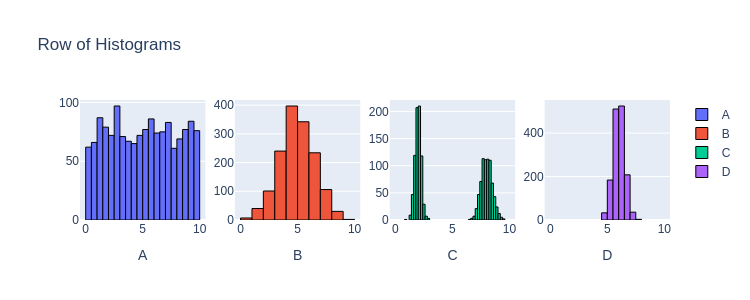

In [24]:
# QUESTION 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4.1: B and D
    
4.2: B and C

4.3: A and B

4.4: A and C


5. The mean of a set of data is the average of all the values, which can be calculated by adding them up and dividing the total by the number of entries. The median, on the other hand, is the middle number you get when you order the numbers from smallest to greatest. A right skewed distribution (in the below example) occurs when the numbers on the bottom half of the list are a lot more concentrated, with a few high value numbers bringing up the value of the mean. A left skewed distribution however, occurs when the numbers on the upper half of the list are more concentrated with a few really low value numbers lowering the mean of the data set.

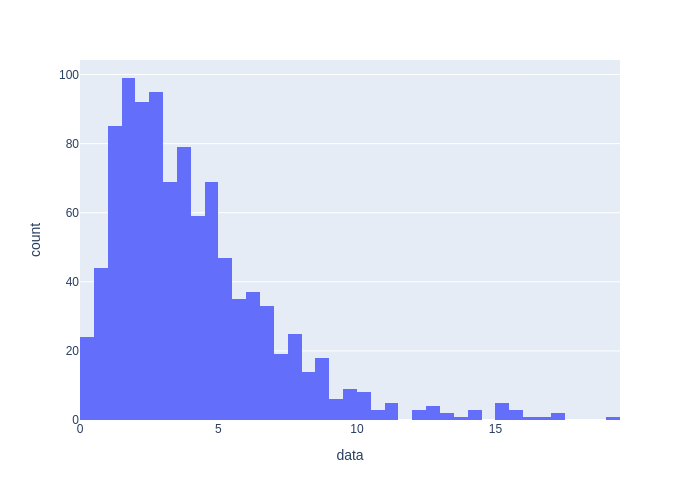

In [34]:
# QUESTION 5

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer = "png")

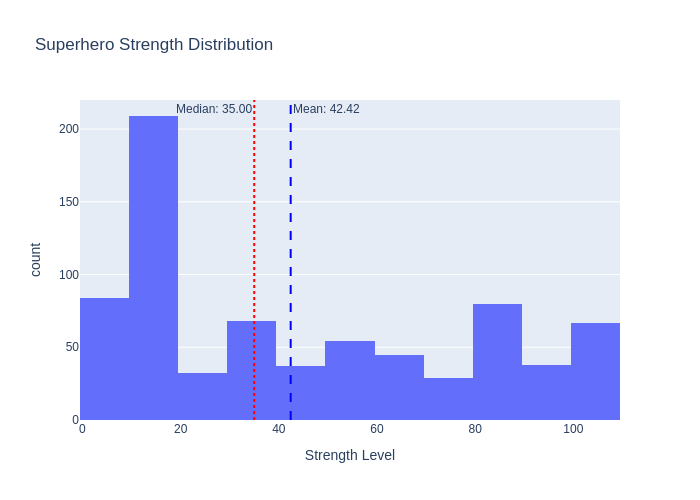

(       Intelligence  Strength   Speed  Durability   Power  Combat  Total Power
 count        743.00    743.00  743.00      743.00  743.00  743.00       743.00
 mean          75.63     42.42   41.06       55.71   60.97   57.49       358.16
 std           27.62     34.37   27.48       33.28   34.26   29.13       107.58
 min            0.00      0.00    0.00        0.00    0.00    0.00       105.00
 25%           75.00     10.00   25.00       30.00   35.00   40.00       260.00
 50%           85.00     35.00   35.00       60.00   65.00   65.00       350.00
 75%           90.00     75.00   60.00       85.00   95.00   80.00       440.00
 max          100.00    100.00  100.00      100.00  240.00  105.00       600.00,
 None)

In [21]:
# QUESTION 6

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv"
df = pd.read_csv(url)

# Calculate summary statistics and round to 2 decimal places
summary_stats = df.describe().round(2)

# Calculate mean and median of Strength
mean_strength = df['Strength'].mean()
median_strength = df['Strength'].median()

# Graph - Plot distribution of Strength
fig = px.histogram(df, x="Strength", title="Superhero Strength Distribution", 
                   labels={"Strength": "Strength Level"}, nbins=20)

# Add mean and median lines with adjusted annotations
fig.add_vline(x=mean_strength, line_dash="dash", line_color="blue",
               annotation_text=f"Mean: {mean_strength:.2f}", 
               annotation_position="top right")
fig.add_vline(x=median_strength, line_dash="dot", line_color="red",
               annotation_text=f"Median: {median_strength:.2f}", 
               annotation_position="top left")

# Show summary statistics and plot
summary_stats, fig.show(renderer = "png")

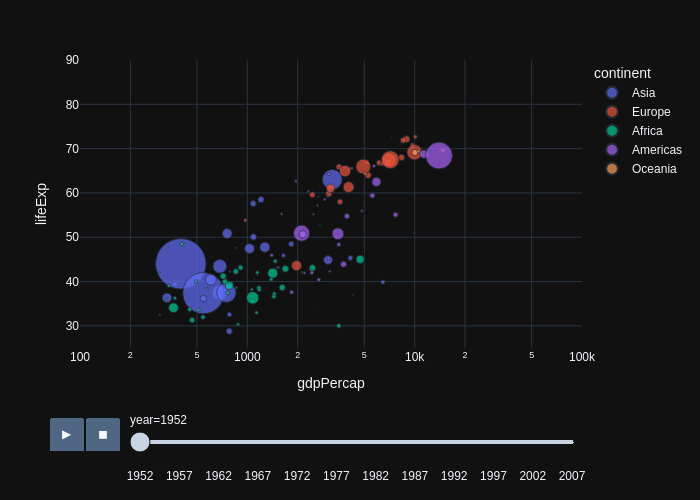

In [2]:
# QUESTION 7
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90],
                 template="plotly_dark")

fig.show(renderer="png")

In [ ]:
# QUESTION 8

import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",
                 size_max=50, range_x=[-0.005, 0.005],
                 template="plotly_dark")

fig.show(renderer="png")

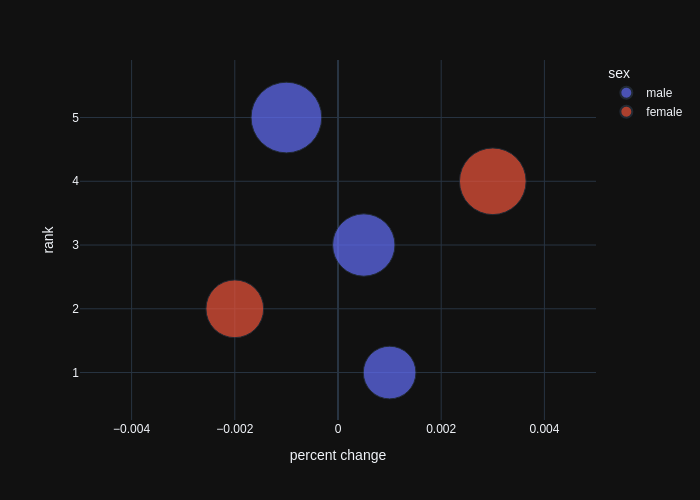

In [40]:
# QUESTION 8
import pandas as pd
import plotly.express as px

data = {
    "percent change": [0.001, -0.002, 0.0005, 0.003, -0.001],
    "rank": [1, 2, 3, 4, 5],
    "percent": [50, 60, 70, 80, 90],
    "sex": ["male", "female", "male", "female", "male"],
    "year": [2000, 2000, 2000, 2000, 2000],
    "name": ["Country A", "Country B", "Country C", "Country D", "Country E"]
}

df = pd.DataFrame(data)

fig = px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",
                 size_max=50, range_x=[-0.005, 0.005], template='plotly_dark')

fig.show(renderer="png")


In [ ]:
9. MOSTLY